In [20]:
!pip install yfinance

In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [22]:
# Definimos el rango de los datos
start = '2017-12-30'
end = '2024-02-24'

In [23]:
# Definimos los tickers de los assets
assets = ['TTWO', 'BABA', 'PYPL', 'INTC', 'META', 'MSFT', 'BRK-B', 'AMZN', 'NVDA', 'AMD', 'VOO', 'NU']
assets.sort()

In [24]:
print(assets)

['AMD', 'AMZN', 'BABA', 'BRK-B', 'INTC', 'META', 'MSFT', 'NU', 'NVDA', 'PYPL', 'TTWO', 'VOO']


In [25]:
# Descargamos los datos
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  12 of 12 completed


In [26]:
print(data)

                   AMD        AMZN        BABA       BRK-B       INTC  \
Date                                                                    
2018-01-02   10.980000   59.450500  181.213989  197.220001  39.740646   
2018-01-03   11.550000   60.209999  181.559357  199.789993  38.391918   
2018-01-04   12.120000   60.479500  183.246689  200.690002  37.687866   
2018-01-05   11.880000   61.457001  188.170486  201.419998  37.950832   
2018-01-08   12.280000   62.343498  187.805389  202.740005  37.950832   
...                ...         ...         ...         ...        ...   
2024-02-16  173.869995  169.509995   73.910004  405.989990  43.509998   
2024-02-20  165.690002  167.080002   73.139999  407.149994  44.520000   
2024-02-21  164.289993  168.589996   75.580002  409.250000  43.470001   
2024-02-22  181.860001  174.580002   76.120003  415.160004  42.980000   
2024-02-23  176.520004  174.990005   75.959999  417.220001  42.990002   

                  META        MSFT     NU        N

In [27]:
# Calculando los retornos

Y = data.resample('M').last().pct_change().dropna()

display(Y.head())

,AMD,AMZN,BABA,BRK-B,INTC,META,MSFT,NU,NVDA,PYPL,TTWO,VOO
Date,,,,,,,,,,,,
2022-01-31,-0.206046,-0.102830,0.058928,0.046890,-0.052039,-0.068649,-0.075345,-0.208955,-0.167454,-0.088238,-0.080914,-0.052409
2022-02-28,0.079562,0.026673,-0.163765,0.026931,-0.015499,-0.326342,-0.037212,0.030997,-0.004125,-0.349017,-0.008204,-0.029805
2022-03-31,-0.113507,0.061437,0.034319,0.097869,0.038994,0.053689,0.031862,0.009150,0.119157,0.033235,-0.050988,0.037892
2022-04-30,-0.217853,-0.237525,-0.107629,-0.085234,-0.120460,-0.098444,-0.099867,-0.221503,-0.320274,-0.239689,-0.222649,-0.087844
2022-05-31,0.191066,-0.032764,-0.010712,-0.021219,0.027096,-0.034070,-0.018077,-0.366057,0.006740,-0.030934,0.042005,0.002588


In [28]:
!pip install riskfolio-lib

In [29]:
import riskfolio as rp

In [30]:
# Construyendo el objeto portafolio
port = rp.Portfolio(returns=Y)

In [31]:
# Calculando el portafolio optimo

# Definiendo los parametros de seleccion del metodo de optimizacion:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

In [32]:
# Estimando el portafolio optimo:

port.alpha = 0.05
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AMD,AMZN,BABA,BRK-B,INTC,META,MSFT,NU,NVDA,PYPL,TTWO,VOO
weights,2.042341e-11,3.952131e-11,0.12413,0.483791,5.206564e-11,3.675868e-11,0.042767,0.028025,1.348383e-11,4.005258e-11,0.135594,0.185693


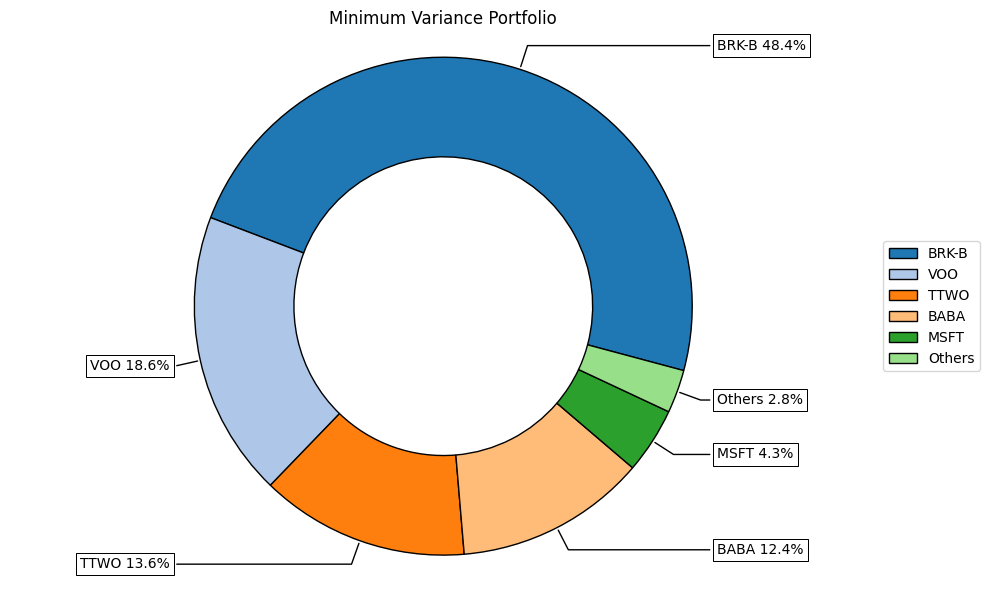

In [33]:
# Graficando la composicion del portafolio

ax = rp.plot_pie(w=w, title='Minimum Variance Portfolio', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


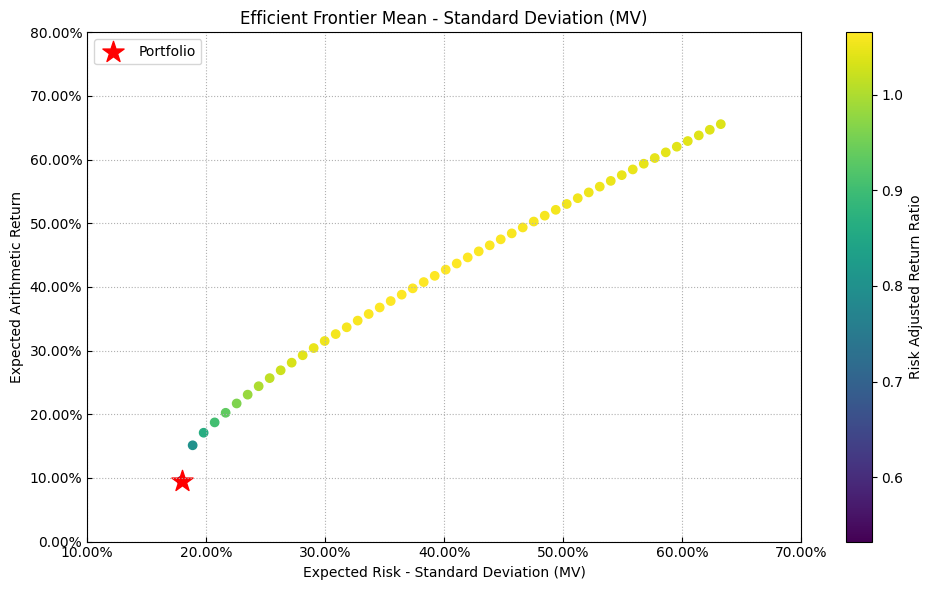

In [34]:
# Graficando la frontera eficiente
frontier=port.efficient_frontier(model=model,rm=rm,points=50,rf=rf,hist=hist)
ax=rp.plot_frontier(w_frontier=frontier,mu=port.mu,cov=port.cov,returns=Y,rm=rm,rf=rf,cmap='viridis',w=w,t_factor=12)
plt.show()

In [35]:
display(frontier.T.head())

,AMD,AMZN,BABA,BRK-B,INTC,META,MSFT,NU,NVDA,PYPL,TTWO,VOO
0,2.042341e-11,3.952131e-11,0.124130,0.483791,5.206564e-11,3.675868e-11,0.042767,0.028025,1.348383e-11,4.005258e-11,1.355943e-01,1.856933e-01
1,3.065516e-08,2.938658e-08,0.077813,0.686812,3.248393e-08,9.134162e-03,0.167128,0.059112,3.250052e-08,9.574363e-09,1.487526e-07,1.728488e-07
2,2.494885e-10,1.749550e-10,0.040747,0.739604,2.010140e-10,6.200135e-02,0.100481,0.057166,4.536635e-10,4.418789e-11,4.196505e-10,5.809608e-10
3,1.659670e-08,9.751450e-09,0.014447,0.777732,1.146847e-08,9.861350e-02,0.049840,0.054829,4.538288e-03,2.347137e-09,2.070880e-08,3.041545e-08
4,6.218630e-09,4.193810e-09,0.005092,0.794117,5.116228e-09,1.078538e-01,0.017634,0.049945,2.535890e-02,1.044037e-09,7.498386e-09,1.171123e-08


In [36]:
frontier*100

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
AMD,2.042341e-09,3.065516e-06,2.494885e-08,1.659670e-06,6.218630e-07,1.473473e-06,1.080563e-06,4.511125e-07,1.166496e-07,3.275700e-08,...,4.345349e-07,3.469116e-08,5.454553e-07,2.996058e-07,1.016850e-07,8.574838e-07,2.371232e-08,7.305727e-07,2.328272e-07,1.529361e-09
AMZN,3.952131e-09,2.938658e-06,1.749550e-08,9.751450e-07,4.193810e-07,1.108406e-06,8.142896e-07,3.697481e-07,1.193806e-07,2.921202e-08,...,4.320839e-07,3.448163e-08,5.475404e-07,3.036409e-07,1.077209e-07,9.270679e-07,2.698759e-08,7.620457e-07,2.497575e-07,9.394669e-10
BABA,1.241297e+01,7.781339e+00,4.074745e+00,1.444715e+00,5.091647e-01,1.055497e-05,3.417157e-06,1.048656e-06,1.207931e-07,6.138660e-08,...,5.145618e-07,4.085654e-08,6.473752e-07,3.589770e-07,1.310144e-07,1.139193e-06,3.369637e-08,9.143891e-07,2.988633e-07,4.932653e-10
BRK-B,4.837908e+01,6.868119e+01,7.396041e+01,7.777320e+01,7.941170e+01,7.962328e+01,7.812827e+01,7.670695e+01,7.533958e+01,7.401462e+01,...,1.674275e+01,1.486547e+01,1.299296e+01,1.112501e+01,9.261348e+00,7.401728e+00,5.546006e+00,3.693899e+00,1.845301e+00,1.070179e-09
INTC,5.206564e-09,3.248393e-06,2.010140e-08,1.146847e-06,5.116228e-07,1.285391e-06,9.186046e-07,4.048461e-07,1.172534e-07,3.107197e-08,...,4.751558e-07,3.795392e-08,6.039925e-07,3.360468e-07,1.208075e-07,1.048424e-06,3.120371e-08,8.608720e-07,2.838996e-07,3.292419e-10
META,3.675868e-09,9.134162e-01,6.200135e+00,9.861350e+00,1.078538e+01,1.102745e+01,1.045668e+01,9.912637e+00,9.389249e+00,8.882490e+00,...,3.611297e-06,2.822045e-07,4.193803e-06,2.217048e-06,6.749976e-07,5.570720e-06,1.488552e-07,5.263589e-06,1.560523e-06,8.594947e-09
MSFT,4.276678e+00,1.671283e+01,1.004808e+01,4.983966e+00,1.763395e+00,1.827613e-05,8.374219e-06,2.556118e-06,2.693566e-07,1.494929e-07,...,1.126245e-06,9.029520e-08,1.417231e-06,7.828192e-07,2.722733e-07,2.360365e-06,7.074878e-08,2.112587e-06,6.849745e-07,7.764480e-10
NU,2.802513e+00,5.911179e+00,5.716628e+00,5.482933e+00,4.994471e+00,4.267811e+00,3.269790e+00,2.314215e+00,1.395637e+00,5.076957e-01,...,1.006265e-06,7.999519e-08,1.260987e-06,6.969777e-07,2.501261e-07,2.166899e-06,6.327806e-08,1.788762e-06,5.734846e-07,9.168951e-10
NVDA,1.348383e-09,3.250052e-06,4.536635e-08,4.538288e-01,2.535890e+00,5.081414e+00,8.145249e+00,1.106619e+01,1.387553e+01,1.659520e+01,...,8.325724e+01,8.513453e+01,8.700703e+01,8.887499e+01,9.073865e+01,9.259825e+01,9.445399e+01,9.630609e+01,9.815469e+01,1.000000e+02
PYPL,4.005258e-09,9.574363e-07,4.418789e-09,2.347137e-07,1.044037e-07,2.838380e-07,2.093813e-07,9.852854e-08,3.477074e-08,8.077529e-09,...,1.461957e-07,1.167381e-08,1.850418e-07,1.022422e-07,3.555357e-08,3.029413e-07,8.628056e-09,2.537105e-07,8.425564e-08,9.213881e-10


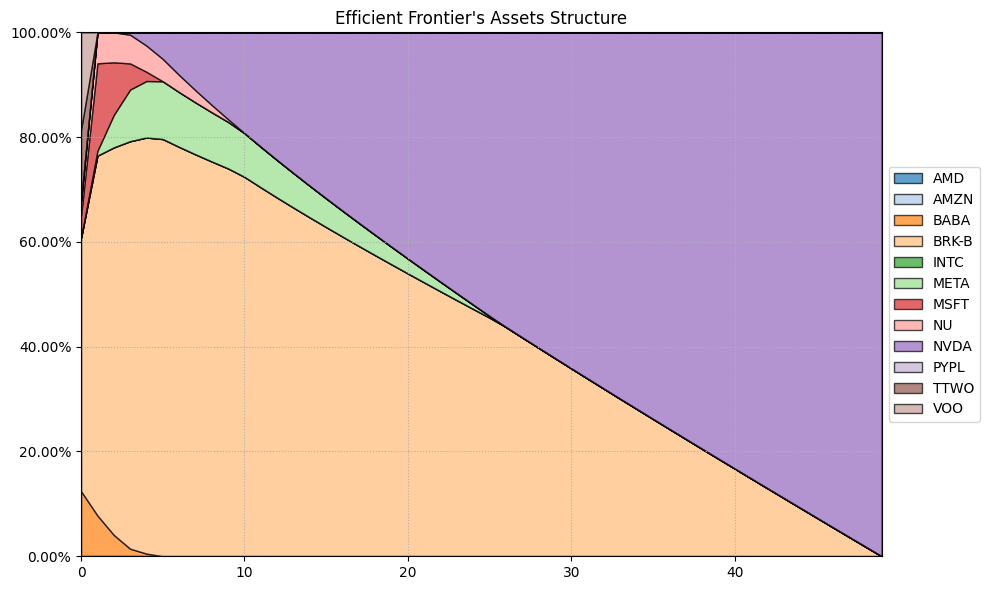

In [37]:
ax=rp.plot_frontier_area(w_frontier=frontier,cmap='tab20')
plt.show()

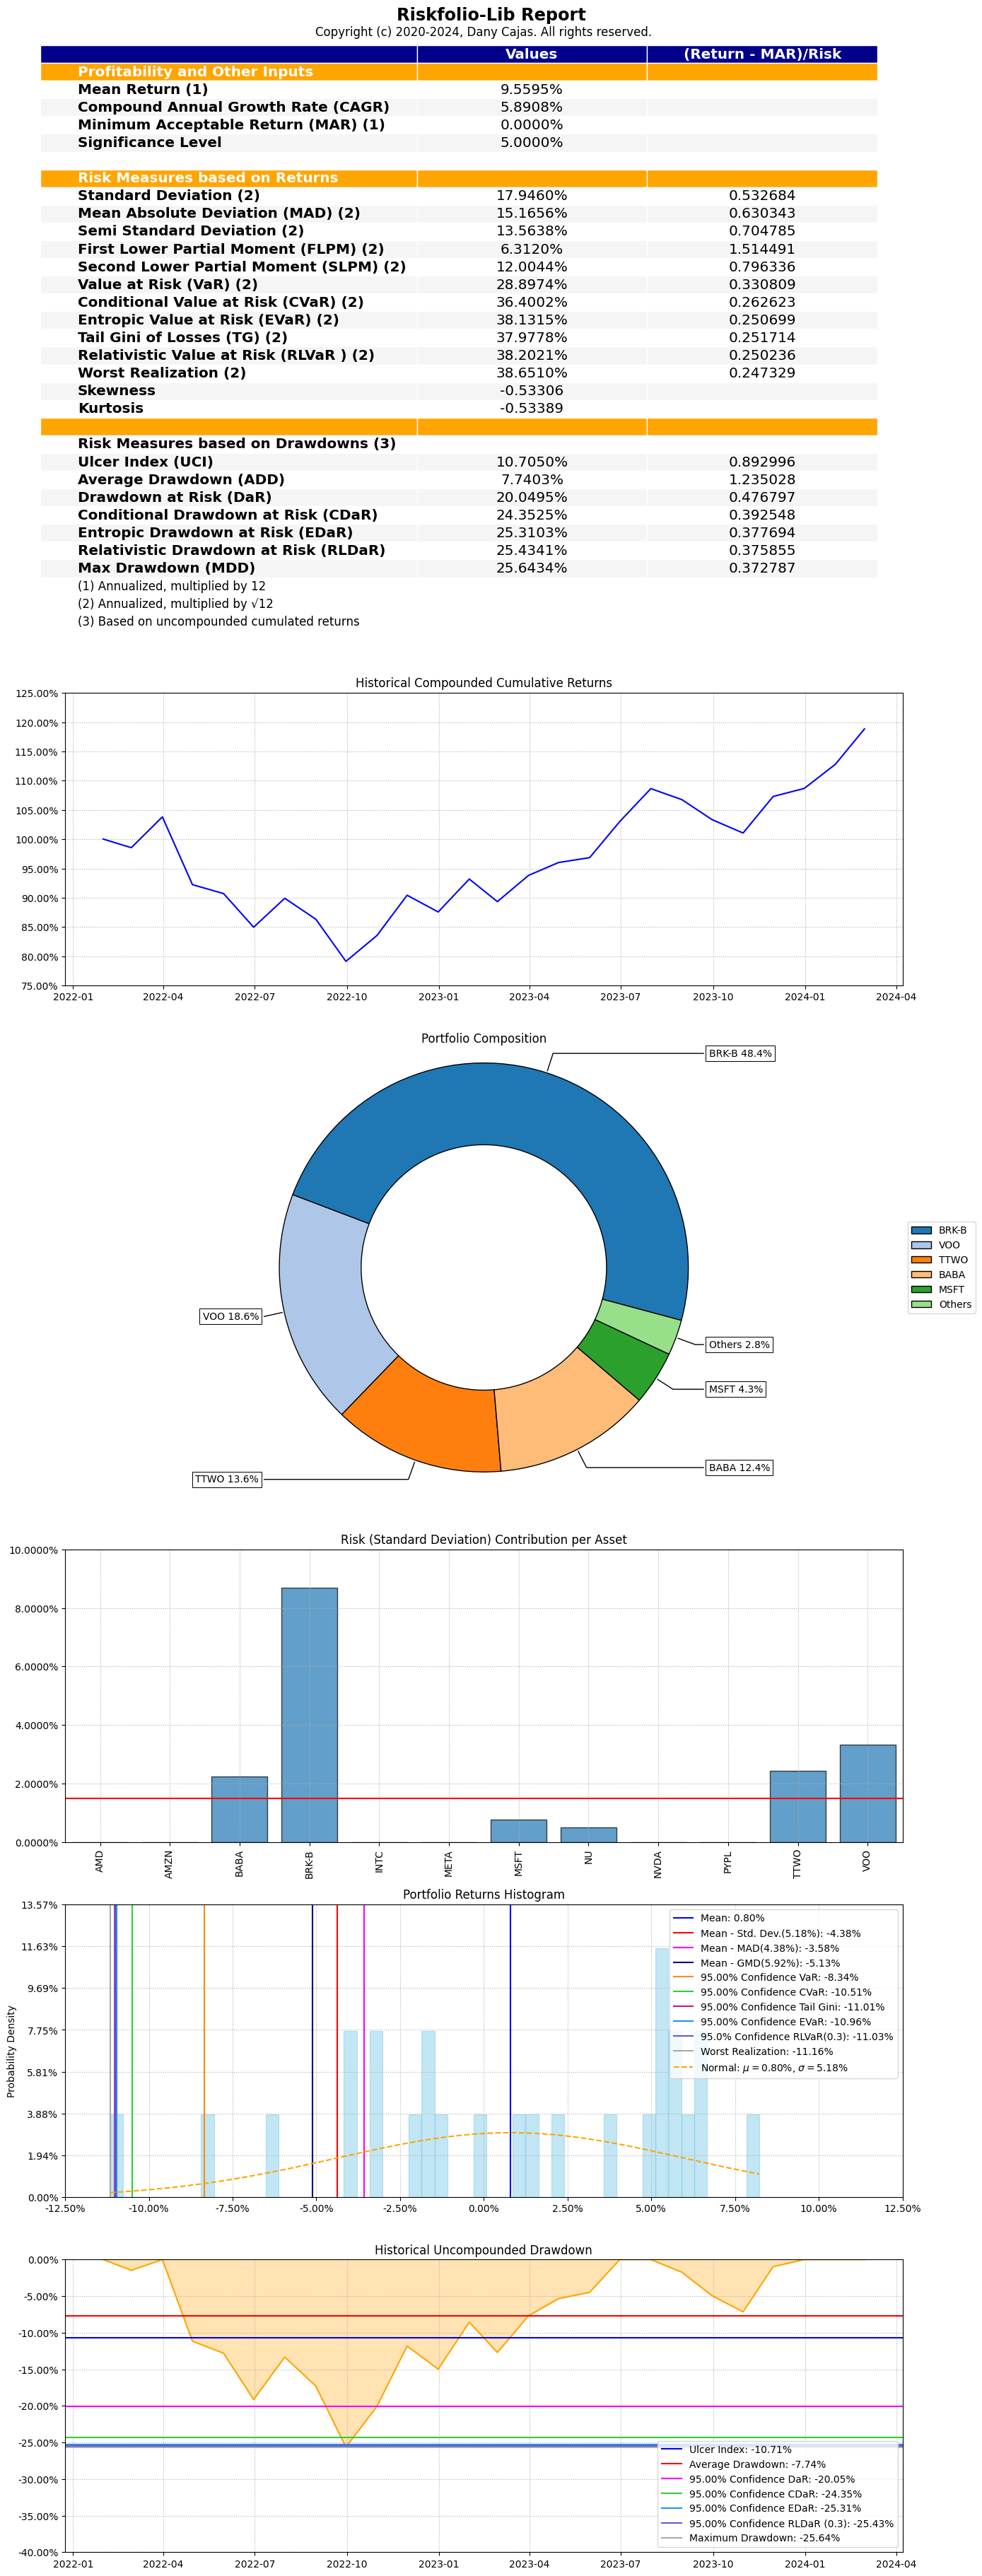

In [38]:
ax=rp.jupyter_report(Y,w,rm=rm,t_factor=12)
plt.show()